# Class 11: part 2 

NYU Tandon C4SUE @avigailvantu , April 2021

## Polygons, merging, more mapping features, and creating choropleth maps 

In this notebook we will be back to working with the NYT COVID-19 data that we worked with in the past few classes. 

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline 

import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopandas import GeoDataFrame
from shapely.geometry import MultiPolygon


## States boundries from the Census Buraeu 

Can be accessed here: 

https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

In [2]:
#load geodataframe
states = gpd.read_file('cb_2018_us_state_500k')

In [3]:
states.head() 

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


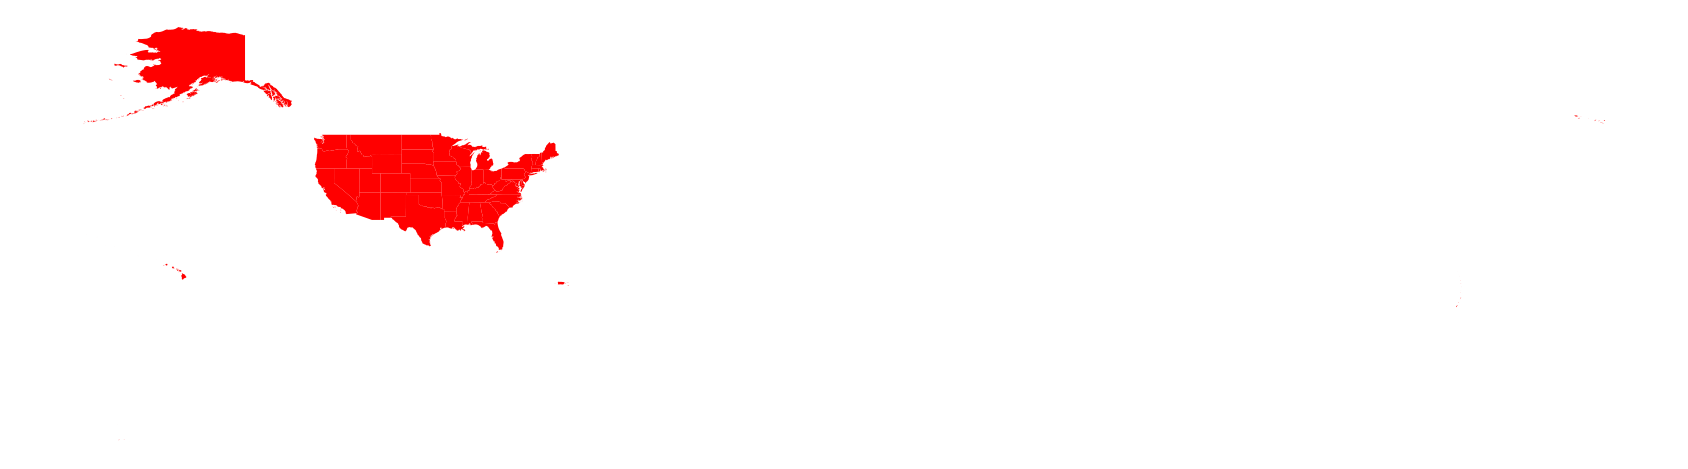

In [4]:
states.plot( color='red',legend=True,figsize=(30, 12),markersize=0.1)
plt.axis('off')
plt.show()

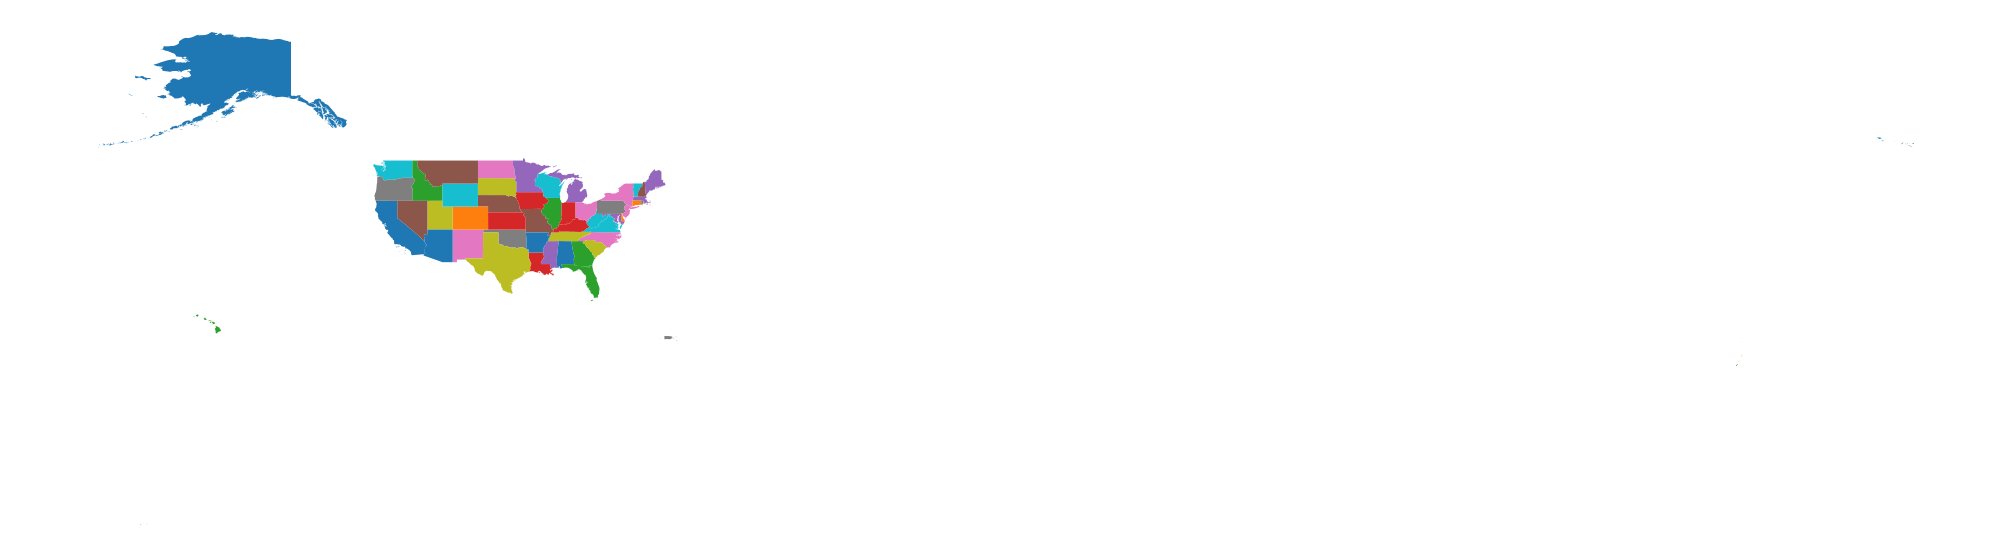

In [5]:
states.plot( column='NAME',legend=False,figsize=(40, 10),markersize=0.1)
plt.axis('off')
plt.show()

## COVID-19 data from the NYT 

my data is up to date as of April 18th 

https://github.com/nytimes/covid-19-data

In [6]:
#Load data

covidUS = pd.read_csv('us-states.csv')

In [7]:
covidUS.shape

(23389, 5)

In [8]:
#let's see the data  

covidUS.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [9]:
covidUS.tail()

,date,state,fips,cases,deaths
23384,2021-05-01,Virginia,51,660553,10777
23385,2021-05-01,Washington,53,406546,5547
23386,2021-05-01,West Virginia,54,153498,2679
23387,2021-05-01,Wisconsin,55,661414,7569
23388,2021-05-01,Wyoming,56,58142,707


# Create a DataFrame for April 18th, the last day in data

In [10]:
#filter as of the last day in the data

april2521 = covidUS[covidUS['date']== '2021-04-25']

In [11]:
#check out the new filtered data
april2521.head()

,date,state,fips,cases,deaths
23004,2021-04-25,Alabama,1,526131,10851
23005,2021-04-25,Alaska,2,66518,318
23006,2021-04-25,Arizona,4,858737,17268
23007,2021-04-25,Arkansas,5,334706,5718
23008,2021-04-25,California,6,3731679,61462


# Time to merge data: 

We will merge data so that we are able to have the covid-19 data merged with the US countries boundries. 

The merge function works the same for DataFrame and GeoDataFrames. Basically, it joins two datasets based on a mutual attribute (column). Because our data is state based, we will merge based on that column. In geographical data, we will join the data without geogrpahical attirbutes (covid 19 for us), into the layer with the geomtery column (state shapfile). 


    

In [12]:
#copy state column as a prep for merging datasets --> both need to be the same name
states['state'] = states['NAME']

In [13]:
# time to merge: 

states = states.merge(april2521, on='state')

In [14]:
#Check out merged data:

states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,state,date,fips,cases,deaths
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",Mississippi,2021-04-25,28,310349,7175
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",North Carolina,2021-04-25,37,963886,12553
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",Oklahoma,2021-04-25,40,446550,6716
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",Virginia,2021-04-25,51,654210,10691
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",West Virginia,2021-04-25,54,151382,2821


## Visualize the merged data: 



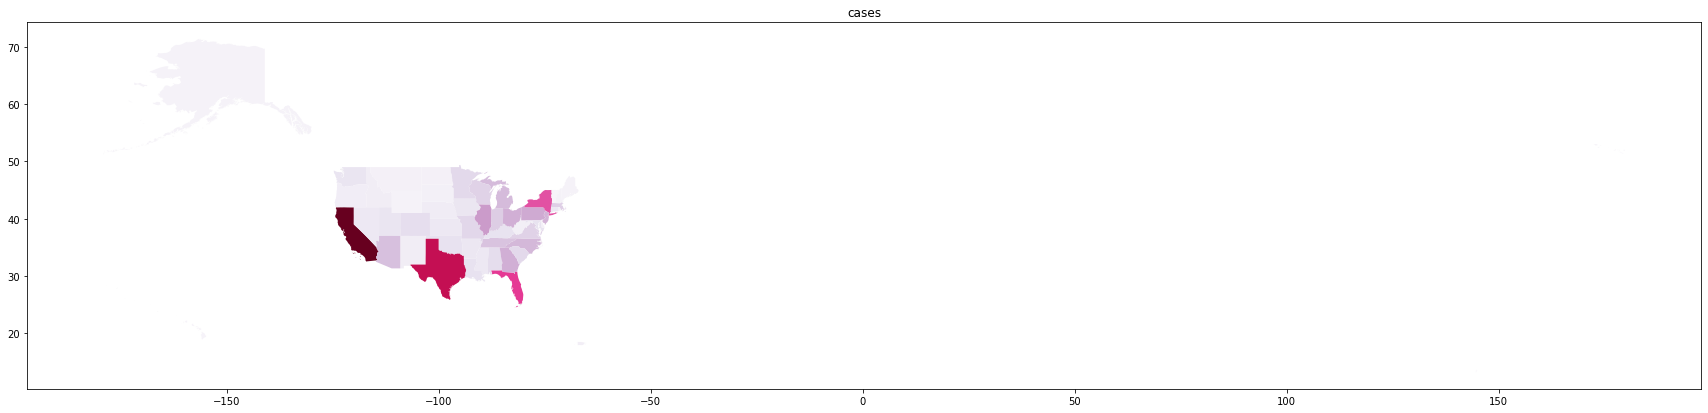

In [15]:
states.plot(column='cases',figsize=(30, 10),cmap='PuRd')

plt.title('cases')
plt.show()


## Set a map x and y range

Often the deafult of the map that will be plotted will not show the map in its ideal range. For example: 


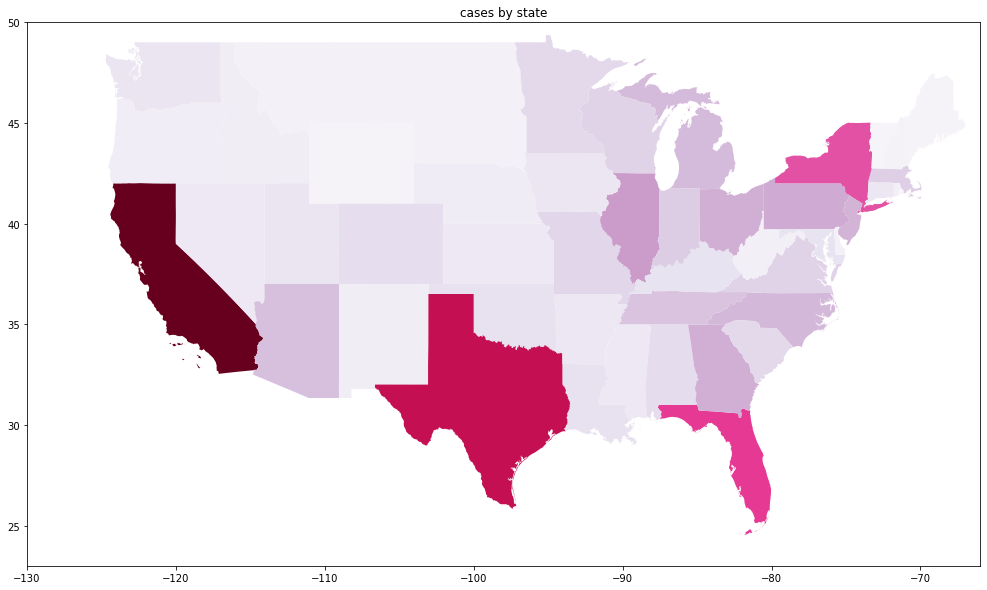

In [16]:
states.plot(column='cases',figsize=(60, 10),cmap='PuRd')

plt.title('cases by state')
plt.ylim((23,50))
plt.xlim((-130,-66))
plt.show()

## And final touches-->

- remove axis, 
- adjust title + its size & color 
- add legend


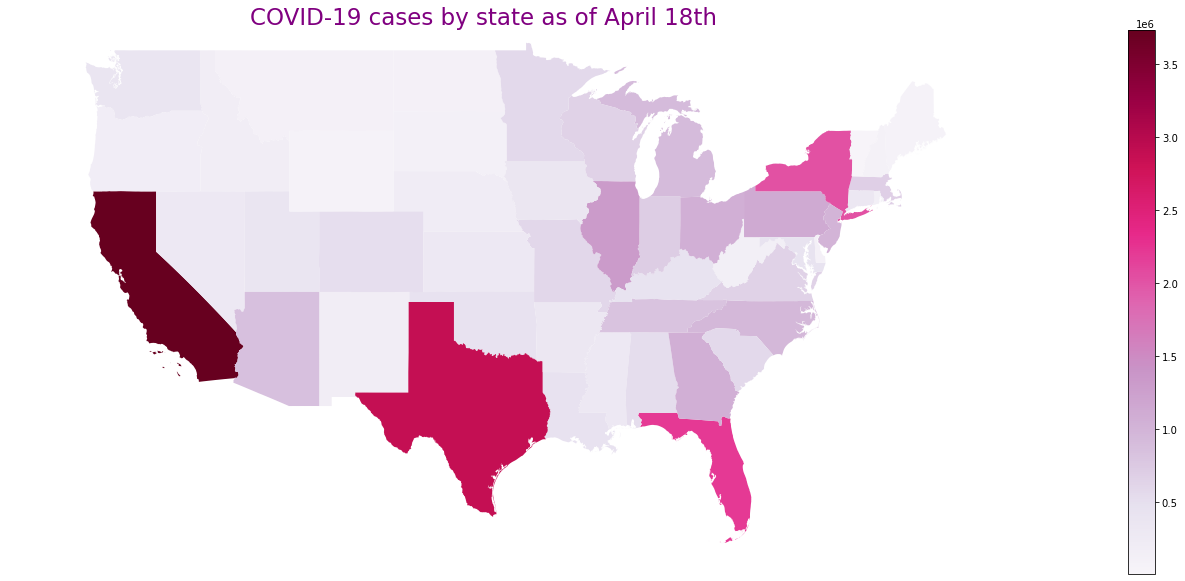

In [17]:
states.plot(column='cases',legend=True, figsize=(60, 10),cmap='PuRd')
plt.axis('off')
plt.title('COVID-19 cases by state as of April 18th', fontsize=23, color ='purple')
plt.ylim((23,50))
plt.xlim((-130,-66))
plt.show()

# Le'ts zoom into the the tri-state area 

To do so first let's plot the axis again so we can see the range of the coordinates we want to zoom into.

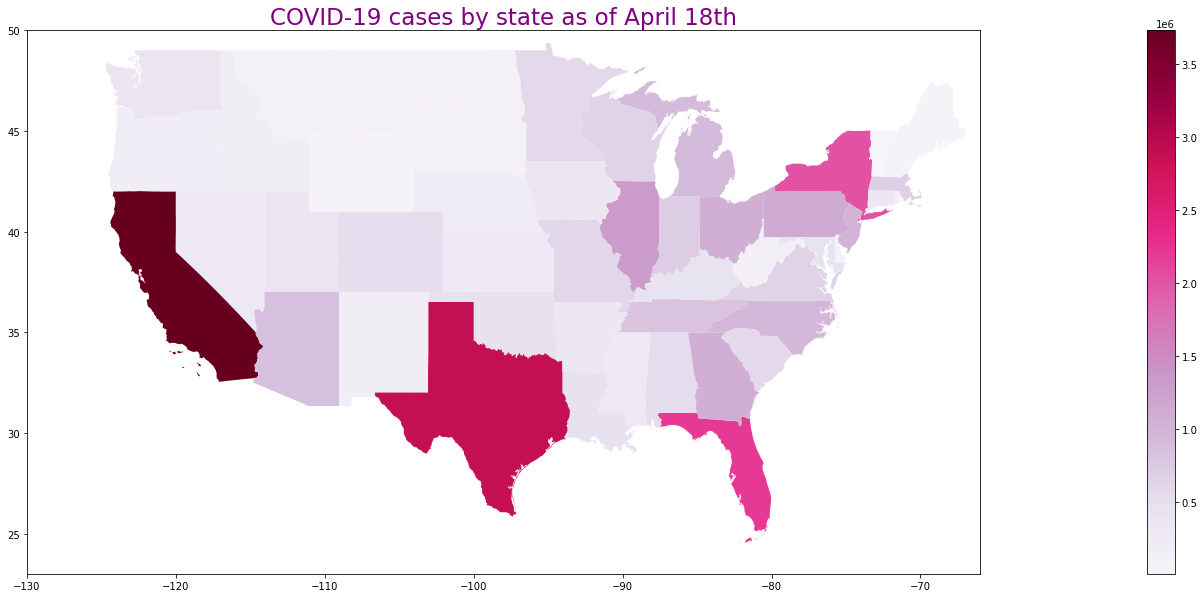

In [18]:
states.plot(column='cases',legend=True, figsize=(60, 10),cmap='PuRd')
#plt.axis('off')
plt.title('COVID-19 cases by state as of April 18th', fontsize=23, color ='purple')
#this is the y range
plt.ylim((23,50))
#this is the x range 
plt.xlim((-130,-66))
plt.show()

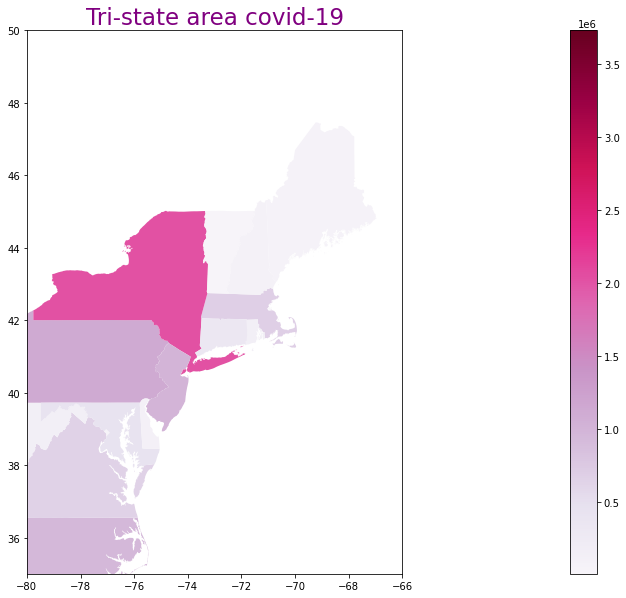

In [19]:
states.plot(column='cases',legend=True, figsize=(60, 10),cmap='PuRd')
#plt.axis('off')
plt.title('Tri-state area covid-19', fontsize=23, color ='purple')
plt.ylim((35,50))
plt.xlim((-80,-66))
plt.show()

# Now Let's Plot Multiple Plots Side-By-Side 

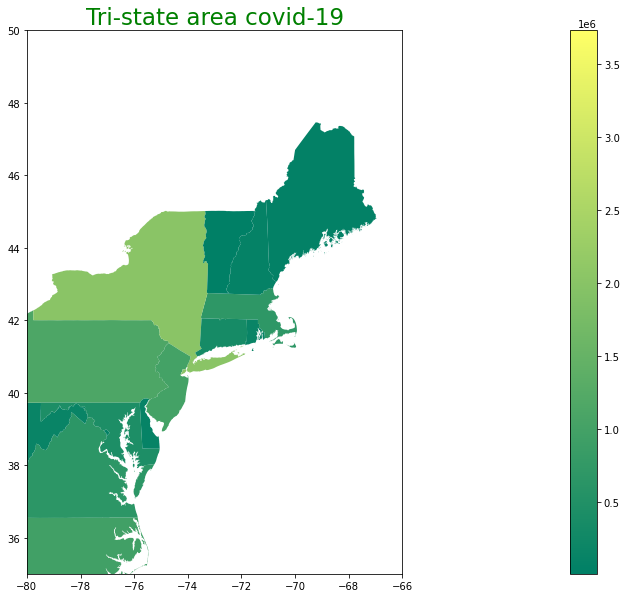

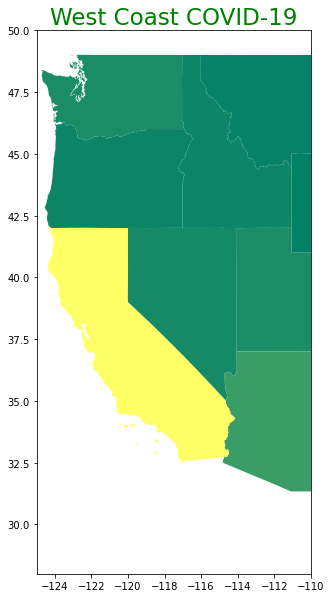

In [20]:
#1.tri-state area 
ax1 = states.plot(column='cases',legend=True, figsize=(60, 10),cmap='summer') 
plt.title('Tri-state area covid-19', fontsize=23, color ='green')
plt.ylim((35,50))
plt.xlim((-80,-66))
plt.show()

#2. west coast 
ax2 = states.plot(column='cases', figsize=(60, 10),cmap='summer')
plt.title('West Coast COVID-19', fontsize=23, color ='green')
plt.ylim((28,50))
plt.xlim((-125,-110))
plt.show()



# Task 1: 

Can you plot 2 plots of the cases in the us:
1. For April 1st, 2020
2. For April 1st, 2021 

* What are some of the trends you found? Which trends have remained the same and which have changed in this past year? 

# Task 2: 

Can you visualize one state's cases only? 

# Task 3: 

using the below counties data, can you merge the data with NYS's counties and visualize the number of cases on April 25th 2021? 

If so, what were the steps that led you there? If not, what are some of the issues you faced and the techniques you looked into? 

Suggested places to look for counties shapefile:
1. https://catalog.data.gov/dataset/tiger-line-shapefile-2016-state-new-york-current-county-subdivision-state-based 
2. https://cugir.library.cornell.edu/catalog/cugir-007865 


Task 1

In [21]:
task12020 = gpd.read_file('cb_2018_us_state_500k')

In [22]:
april12020 = covidUS[covidUS['date']== '2020-04-01']

In [23]:
april12020.head()

,date,state,fips,cases,deaths
1609,2020-04-01,Alabama,1,1108,28
1610,2020-04-01,Alaska,2,143,2
1611,2020-04-01,Arizona,4,1413,29
1612,2020-04-01,Arkansas,5,624,10
1613,2020-04-01,California,6,9857,212


In [24]:
task12020['state'] = task12020['NAME']

In [25]:
task12020 = task12020.merge(april12020, on='state')

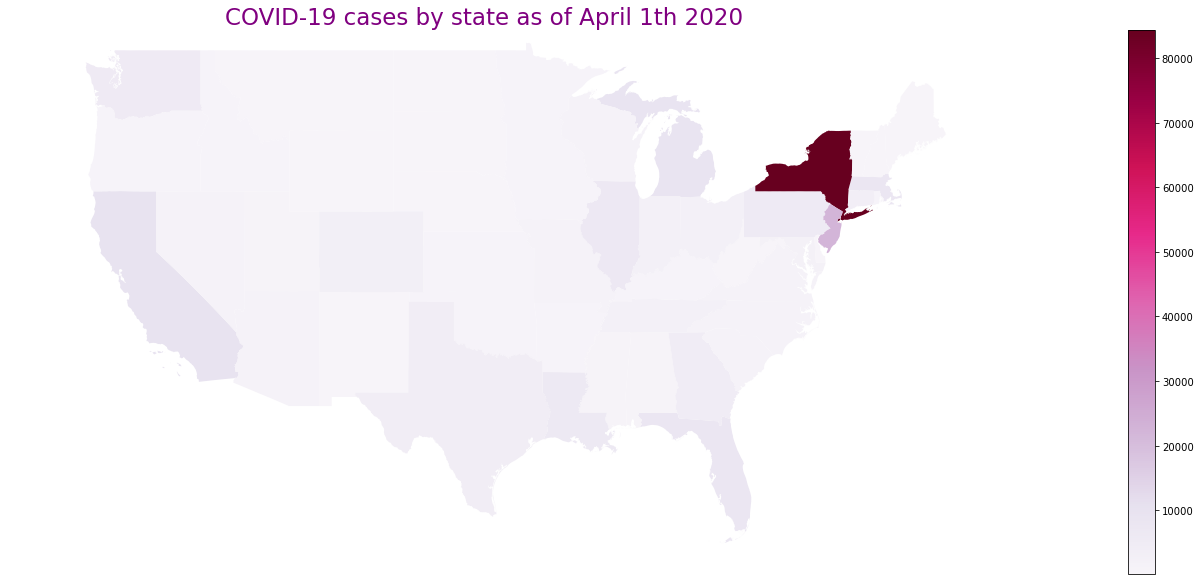

In [26]:
task12020.plot(column='cases',legend=True, figsize=(60, 10),cmap='PuRd')
plt.axis('off')
plt.title('COVID-19 cases by state as of April 1th 2020', fontsize=23, color ='purple')
plt.ylim((23,50))
plt.xlim((-130,-66))
plt.show()

In [27]:
task12021 = gpd.read_file('cb_2018_us_state_500k')

In [28]:
april12021 = covidUS[covidUS['date']== '2021-04-01']

In [29]:
task12021['state'] = task12021['NAME']

In [30]:
task12021 = task12021.merge(april12021, on='state')

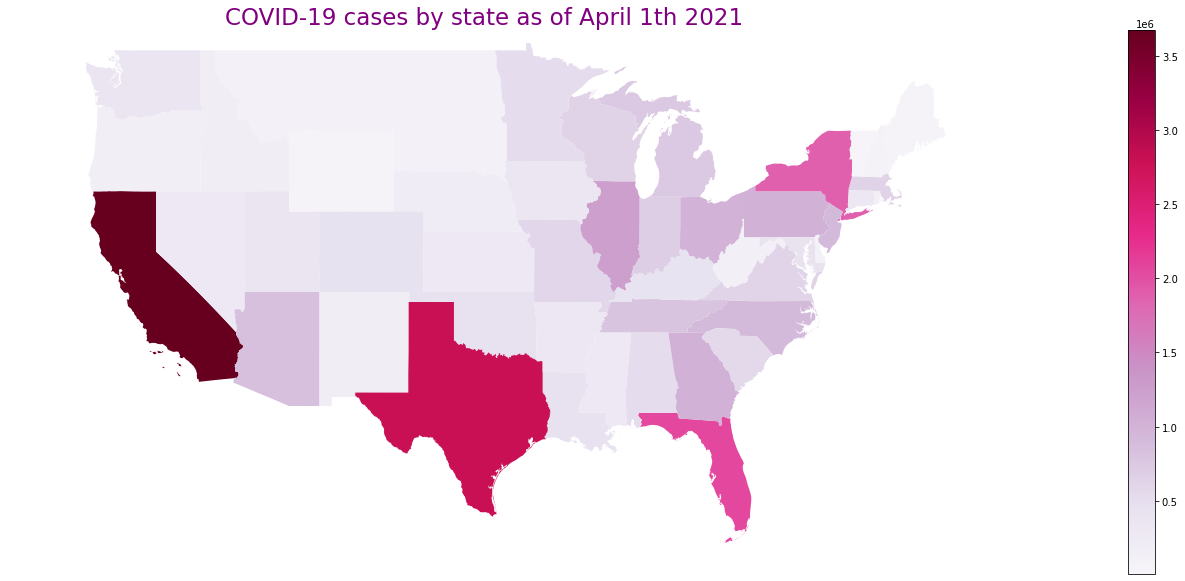

In [31]:
task12021.plot(column='cases',legend=True, figsize=(60, 10),cmap='PuRd')
plt.axis('off')
plt.title('COVID-19 cases by state as of April 1th 2021', fontsize=23, color ='purple')
plt.ylim((23,50))
plt.xlim((-130,-66))
plt.show()


Based on the map differences from 2020 the area from upper west side and central us stayed closely similar in both years. A lot of the east coast areas and lower areas, west coast area have increased in covid cases.


Task 2

In [45]:
gpd_task_2_2020 = gpd.read_file('cb_2018_us_state_500k')
gpd_task_2_2020.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [46]:
#gpd_task_2_2020 = gpd_task_2_2020[gpd_task_2_2020['NAME']== 'New York']
#gpd_task_2_2020 = gpd_task_2_2020.reset_index()
#gpd_task_2_2020.head()

In [47]:
us_task_2_2020 = pd.read_csv('us-states.csv')
us_task_2_2020.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [48]:
us_task_2_2020_april = us_task_2_2020[us_task_2_2020['date']== '2020-04-01']

In [49]:
gpd_task_2_2020['state'] = gpd_task_2_2020['NAME']
gpd_task_2_2020 = gpd_task_2_2020.merge(us_task_2_2020_april, on='state')

In [50]:
gpd_task_2_2020.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,state,date,fips,cases,deaths
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",Mississippi,2020-04-01,28,1073,22
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",North Carolina,2020-04-01,37,1591,11
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",Oklahoma,2020-04-01,40,719,30
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",Virginia,2020-04-01,51,1511,18
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",West Virginia,2020-04-01,54,191,2


In [61]:
gpd_task_2_2020[gpd_task_2_2020["NAME"] == "New York"]

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,state,date,fips,cases,deaths
25,36,01779796,0400000US36,36,NY,New York,00,122049149763,19246994695,"MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ...",New York,2020-04-01,36,84364,2415


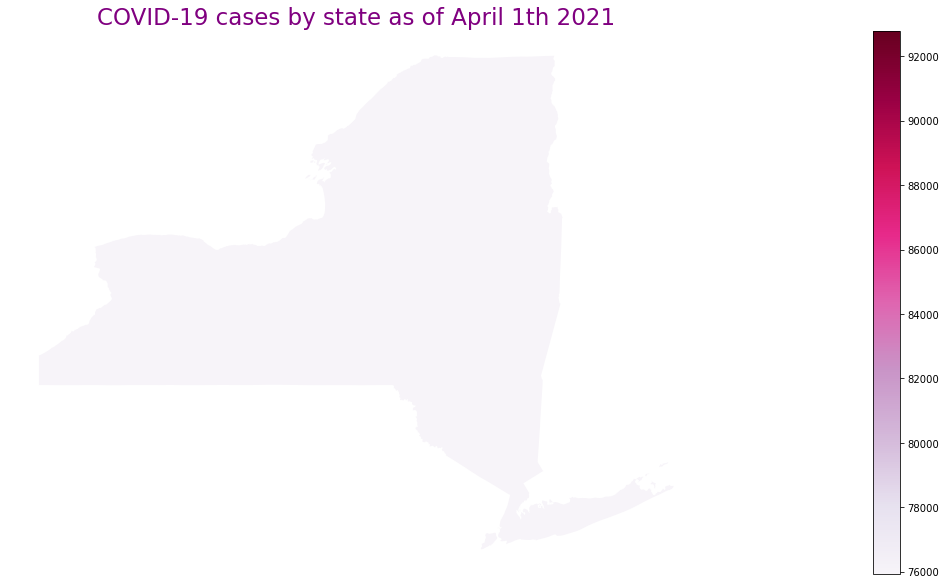

In [55]:
gpd_task_2_2020[gpd_task_2_2020["NAME"] == "New York"].plot(column='cases',legend=True, figsize=(60, 10),cmap='PuRd')
plt.axis('off')
plt.title('COVID-19 cases by state as of April 1th 2021', fontsize=23, color ='purple')
plt.show()

In [56]:
gpd_task_2_2021 = gpd.read_file('cb_2018_us_state_500k')
gpd_task_2_2021.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [57]:
us_task_2_2021 = pd.read_csv('us-states.csv')
us_task_2_2021.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [58]:
us_task_2_2021_april = us_task_2_2021[us_task_2_2021['date']== '2021-04-01']

In [59]:
gpd_task_2_2021['state'] = gpd_task_2_2021['NAME']
gpd_task_2_2021 = gpd_task_2_2021.merge(us_task_2_2021_april, on='state')

In [63]:
gpd_task_2_2021[gpd_task_2_2021["NAME"] == "New York"]

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,state,date,fips,cases,deaths
25,36,01779796,0400000US36,36,NY,New York,00,122049149763,19246994695,"MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ...",New York,2021-04-01,36,1880768,49872


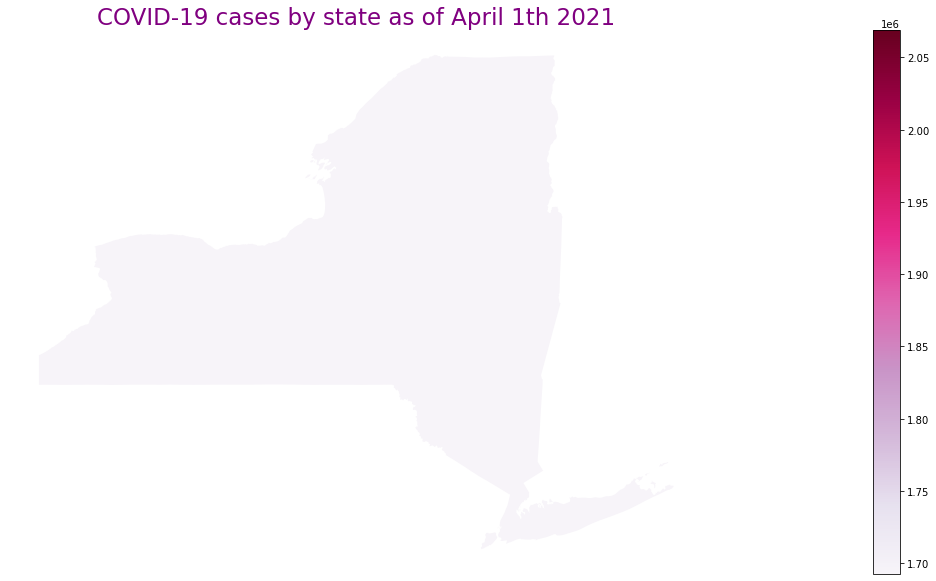

In [62]:
gpd_task_2_2021[gpd_task_2_2021["NAME"] == "New York"].plot(column='cases',legend=True, figsize=(60, 10),cmap='PuRd')
plt.axis('off')
plt.title('COVID-19 cases by state as of April 1th 2021', fontsize=23, color ='purple')
plt.show()

When visualizing one one state's covid cases such as the New York State for both years you are not able to see the color output being compared to the rest of the world map

Task 3

In [77]:
counties = pd.read_csv('us-counties.csv')
counties_ny = counties[counties['state']=='New York']
counties_ny = counties_ny[counties_ny['date']=='2021-04-25']
counties_ny.head(58)

,date,county,state,fips,cases,deaths
1256661,2021-04-25,Albany,New York,36001.0,23976,347.0
1256662,2021-04-25,Allegany,New York,36003.0,3242,83.0
1256663,2021-04-25,Broome,New York,36007.0,17758,352.0
1256664,2021-04-25,Cattaraugus,New York,36009.0,5270,82.0
1256665,2021-04-25,Cayuga,New York,36011.0,5962,90.0
1256666,2021-04-25,Chautauqua,New York,36013.0,8531,137.0
1256667,2021-04-25,Chemung,New York,36015.0,7279,133.0
1256668,2021-04-25,Chenango,New York,36017.0,3213,75.0
1256669,2021-04-25,Clinton,New York,36019.0,4642,33.0
1256670,2021-04-25,Columbia,New York,36021.0,3865,100.0


In [74]:
len(counties_ny)

58

In [81]:
newyork = gpd.read_file('newyork')
newyork.shape

(67, 81)

In [83]:
newyork.head(5)

,STATE,COUNTY,NAME,LSAD,LSAD_TRANS,OID_,COUNTY_FIP,POP2000,WHITE,BLACK,...,FHH_MINORC,FAMILIES,AV_FAM_SZ,HSE_UNITS,URBAN,RURAL,VACANT,OWNER_OCC,RENTER_OCC,geometry
0,36,089,St. Lawrence,06,County,44,089,111931,105782,2664,...,2773,26939,3,49721,16085,33636,9215,28606,11900,"POLYGON ((-74.71240 44.95301, -74.71113 44.953..."
1,36,019,Clinton,06,County,9,019,79894,74562,2863,...,1951,19261,3,33091,12161,20930,3668,20157,9266,"POLYGON ((-74.02503 44.98004, -74.02740 44.995..."
2,36,033,Franklin,06,County,16,033,51134,42970,3389,...,1312,11805,3,23936,7409,16527,6005,12638,5293,"POLYGON ((-74.02503 44.98004, -74.02108 44.958..."
3,36,031,Essex,06,County,15,031,38851,36848,1092,...,810,9832,3,23115,4288,18827,8087,11089,3939,"POLYGON ((-73.46412 44.53540, -73.46494 44.536..."
4,36,045,Jefferson,06,County,22,045,111738,99118,6517,...,2815,28142,3,54070,20947,33123,14002,23906,16162,"POLYGON ((-75.86007 44.40327, -75.83967 44.393..."


In [84]:
newyork['county'] = newyork['NAME']

In [85]:
newyork = newyork.merge(counties_ny, on='county')

In [86]:
newyork.head()

,STATE,COUNTY,NAME,LSAD,LSAD_TRANS,OID_,COUNTY_FIP,POP2000,WHITE,BLACK,...,VACANT,OWNER_OCC,RENTER_OCC,geometry,county,date,state,fips,cases,deaths
0,36,089,St. Lawrence,06,County,44,089,111931,105782,2664,...,9215,28606,11900,"POLYGON ((-74.71240 44.95301, -74.71113 44.953...",St. Lawrence,2021-04-25,New York,36089.0,6294,95.0
1,36,019,Clinton,06,County,9,019,79894,74562,2863,...,3668,20157,9266,"POLYGON ((-74.02503 44.98004, -74.02740 44.995...",Clinton,2021-04-25,New York,36019.0,4642,33.0
2,36,033,Franklin,06,County,16,033,51134,42970,3389,...,6005,12638,5293,"POLYGON ((-74.02503 44.98004, -74.02108 44.958...",Franklin,2021-04-25,New York,36033.0,2439,12.0
3,36,031,Essex,06,County,15,031,38851,36848,1092,...,8087,11089,3939,"POLYGON ((-73.46412 44.53540, -73.46494 44.536...",Essex,2021-04-25,New York,36031.0,1521,26.0
4,36,045,Jefferson,06,County,22,045,111738,99118,6517,...,14002,23906,16162,"POLYGON ((-75.86007 44.40327, -75.83967 44.393...",Jefferson,2021-04-25,New York,36045.0,5544,65.0


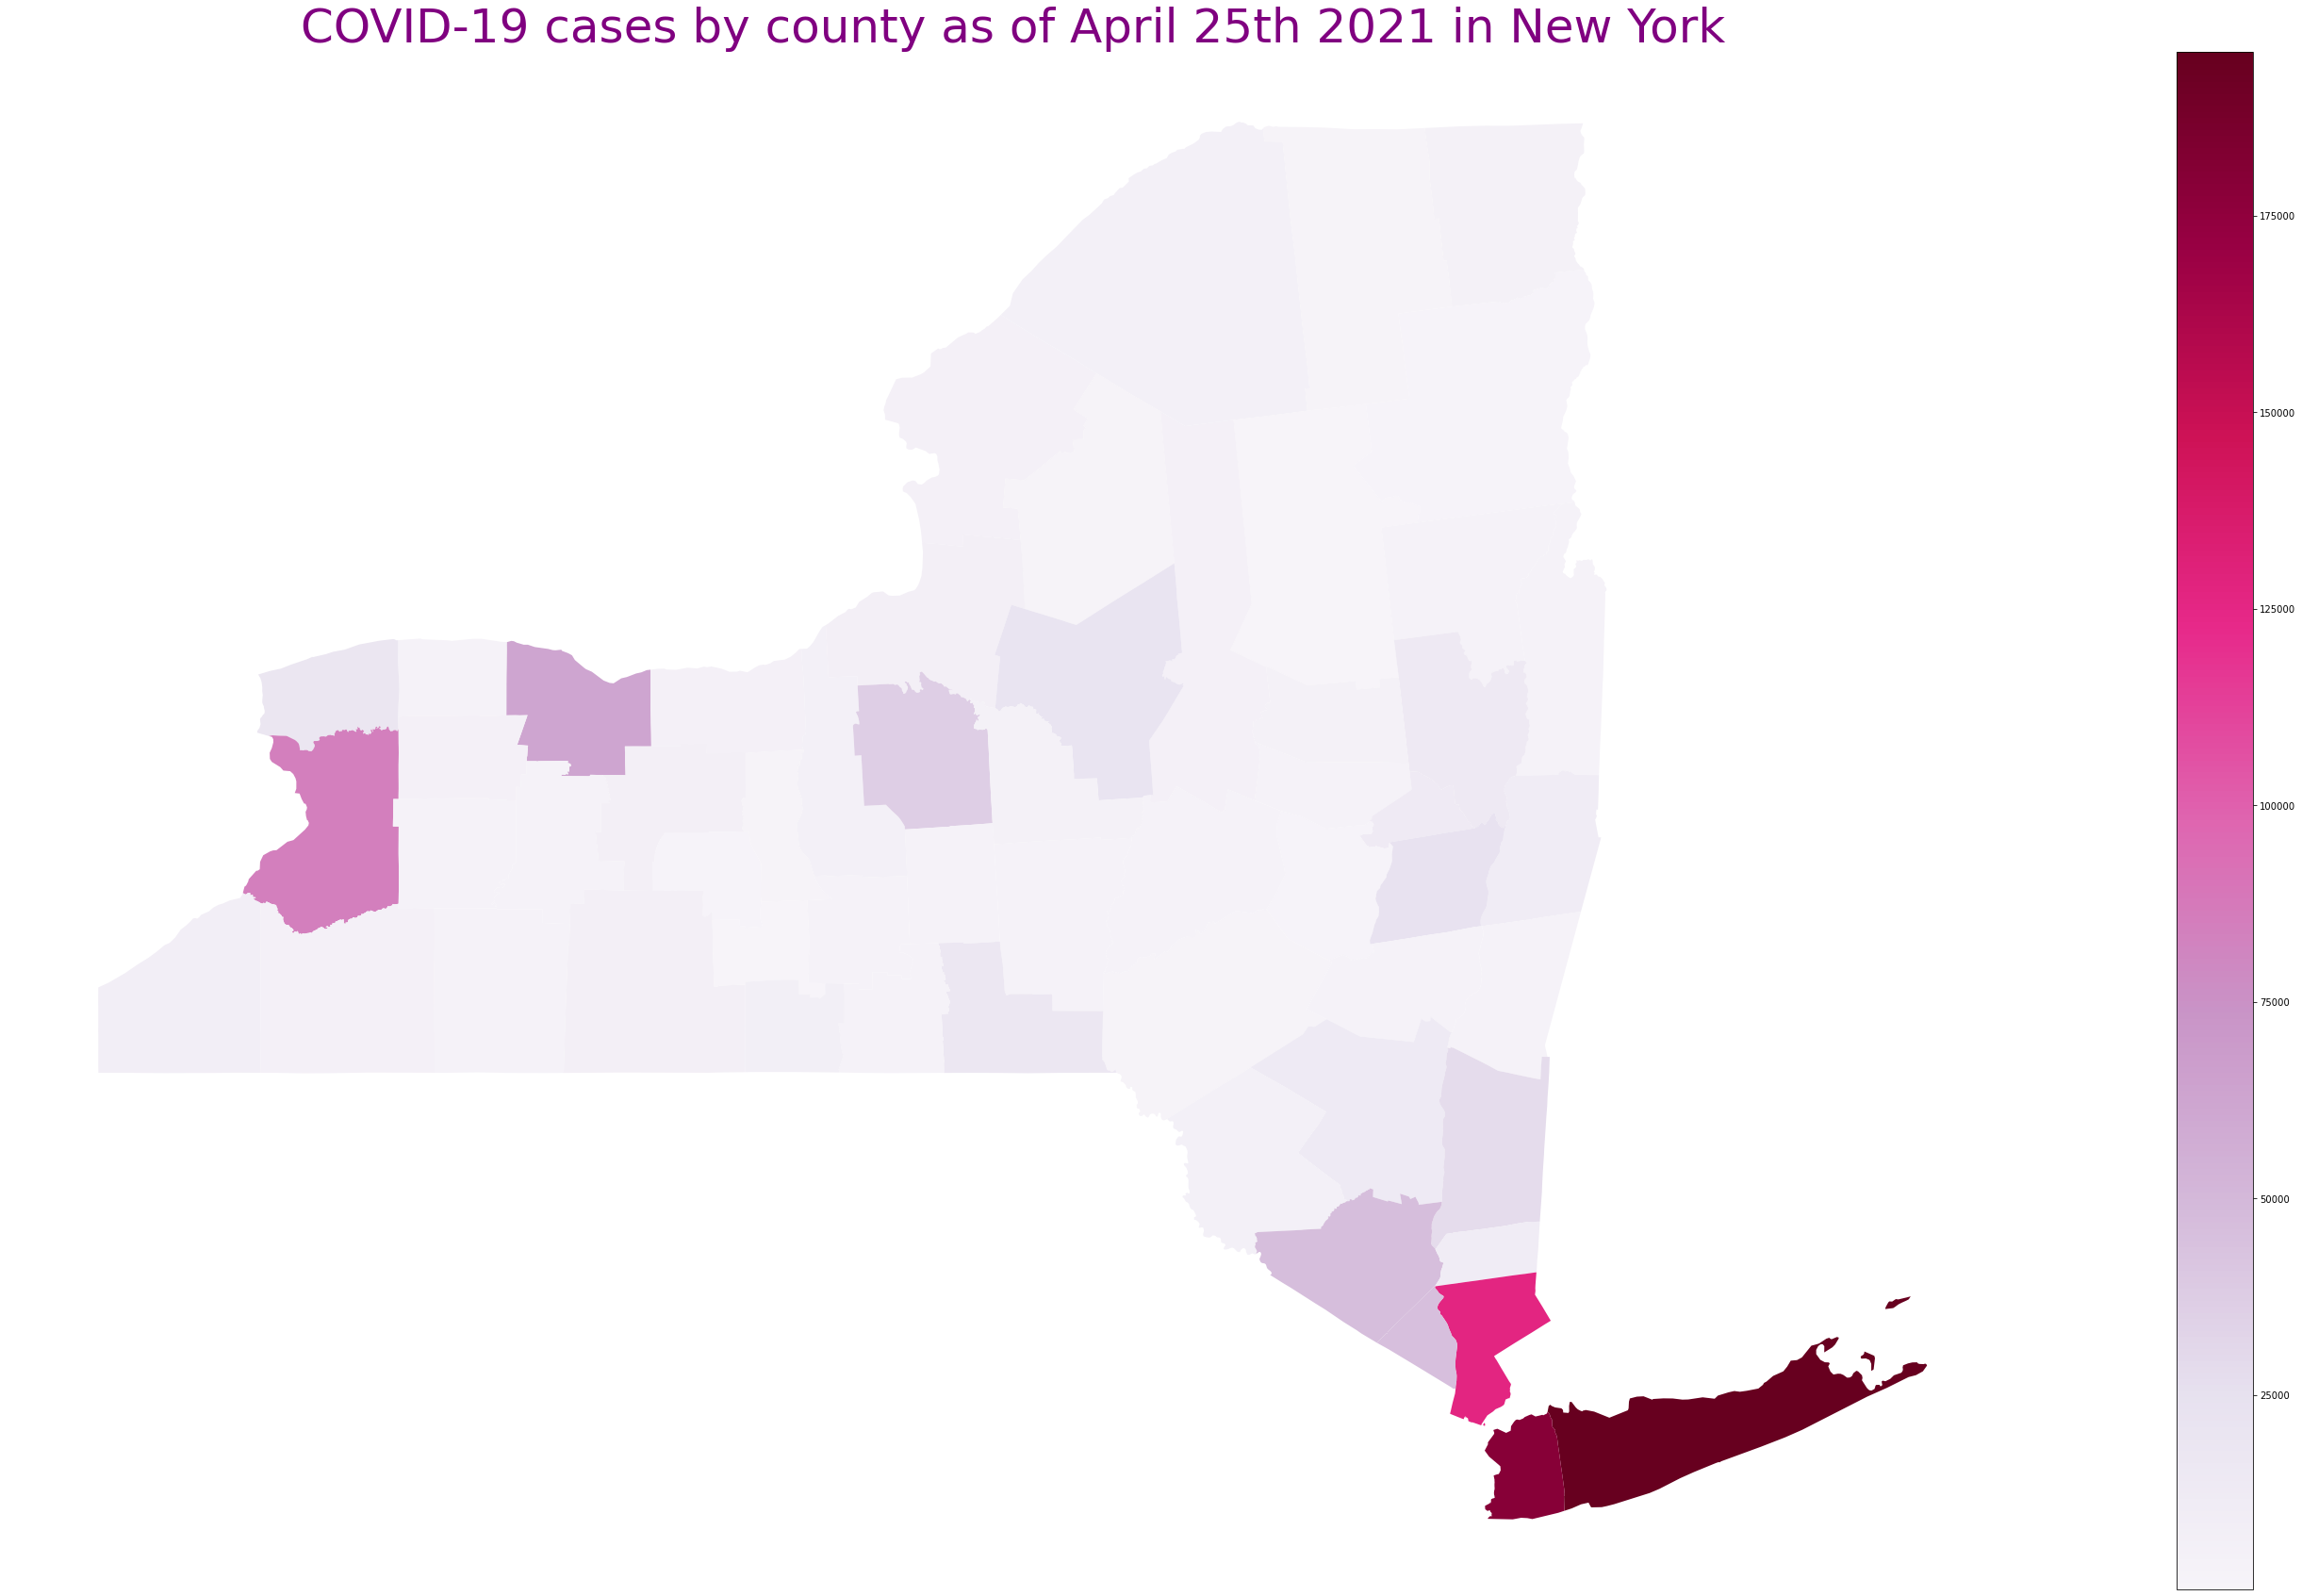

In [91]:
newyork.plot(column='cases',legend=True, figsize=(60, 30),cmap='PuRd')
plt.axis('off')
plt.title('COVID-19 cases by county as of April 25th 2021 in New York', fontsize=50, color ='purple')
plt.show()

The steps I took was to read in the us counties csv then i indexed the df by the State and then I indexed the df by the date.
The next steps were to read in the date in the shape file the first link the shape of the df had over 100+ rows so i switched 
to the next linked. I was afraid that since both the csv file and the shapefile did not have the same number of rows that would
lead to a problem when mergeing. However everything went fine and I was able to plot the map.